<a href="https://colab.research.google.com/github/anishjohnson/Credit_Card_Default_Prediction/blob/main/Credit_Card_Default_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

# **Import Libraries and Data.**

In [1]:
# import the libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,accuracy_score,precision_score
from sklearn.metrics import precision_score,recall_score,accuracy_score,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,auc,r2_score,f1_score,plot_confusion_matrix,plot_roc_curve,plot_precision_recall_curve

from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV 

# Import models.
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
 
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Mount the drive.
from google.colab import drive
drive.mount('/content/drive/')

# Load the data.
df = pd.read_csv('/content/drive/MyDrive/Capstone data files/default of credit card clients_.csv', header=1)

# Create a copy of data to be on the safer side.
credit_df = df.copy()

Mounted at /content/drive/


# **Detailed Data Description:**
## **> Basic User Data.**
* **ID :** Unique ID of each client.
* **LIMIT_BAL :** Amount of the given credit (NT dollar) : it includes both the individual consumer credit and his/her family (supplementary) credit.
* **SEX :**  Gender (1 = male; 2 = female).
* **EDUCATION :** Qualifications (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* **MARRIAGE :** Marital status (1 = married; 2 = single; 3 = others).
* **AGE :** Age of the client (years)

## > **History of Past Payment.**
**Scale for PAY_0 to PAY_6 :** (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

* **PAY_0 :** Repayment status in September, 2005 (scale same as above)
* **PAY_2 :** Repayment status in August, 2005 (scale same as above)
* **PAY_3 :** Repayment status in July, 2005 (scale same as above)
* **PAY_4 :** Repayment status in June, 2005 (scale same as above)
* **PAY_5 :** Repayment status in May, 2005 (scale same as above)
* **PAY_6 :** Repayment status in April, 2005 (scale same as above)

## > **Amount of Bill Statement.**
* **BILL_AMT1 :** Amount of bill statement in September, 2005 (NT dollar)
* **BILL_AMT2 :** Amount of bill statement in August, 2005 (NT dollar)
* **BILL_AMT3 :** Amount of bill statement in July, 2005 (NT dollar)
* **BILL_AMT4 :** Amount of bill statement in June, 2005 (NT dollar)
* **BILL_AMT5 :** Amount of bill statement in May, 2005 (NT dollar)
* **BILL_AMT6 :** Amount of bill statement in April, 2005 (NT dollar)

## > **Amount of Previous Payment.**
* **PAY_AMT1 :** Amount of previous payment in September, 2005 (NT dollar)
* **PAY_AMT2 :** Amount of previous payment in August, 2005 (NT dollar)
* **PAY_AMT3 :** Amount of previous payment in July, 2005 (NT dollar)
* **PAY_AMT4 :** Amount of previous payment in June, 2005 (NT dollar)
* **PAY_AMT5 :** Amount of previous payment in May, 2005 (NT dollar)
* **PAY_AMT6 :** Amount of previous payment in April, 2005 (NT dollar)

## >  **Response Variable.**
* **default payment next month :** Default payment (1=yes, 0=no)


# **First look at the data:**

In [3]:
# Check shape of data.
credit_df.shape

(30000, 25)

In [4]:
# Check if null values exist.
credit_df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [5]:
# Check if there are any duplicate values.
credit_df.duplicated().sum()

0

In [6]:
# First two values of the data.
credit_df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [7]:
# Last two values of the data.
credit_df.tail(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,0,0,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [8]:
credit_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


* **There are 30000 rows and 25 columns in the given data.**
* **There are no duplicate and null values present.**
* **We will have to rename few variables to understand them easily.**
* **Education has few extra values [0,5,6], we will add them into category [4] since we are only been provided with details for [1,2,3,4].**
* **Marriage also has an extra value [0], we will add it into category [3].**

***Rename few variabless.***

In [9]:
# Rename dependent variable.
credit_df.rename(columns={'default payment next month' : 'DEFAULT'}, inplace=True)

# Rename variables in History of Past Payment.
credit_df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)

# Rename variables in Amount in Bill Statement.
credit_df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)

# Rename variables in Amount in Previous Payment.
credit_df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

***Replace extra values in EDUCATION.***

In [10]:
# Replace 0,5,6 with 4.
credit_df['EDUCATION'] = credit_df['EDUCATION'].replace({0:4, 5:4, 6:4})

# Check if the values are replaced.
credit_df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

***Replace extra values in MARRIAGE.***

In [11]:
# Replace 0 with 3.
credit_df['MARRIAGE'] = credit_df['MARRIAGE'].replace(0,3)

# Check if the values are replaced.
credit_df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

# **Exploratory Data Analysis:**

## **Dependent Variable**: **[default payment next month]**

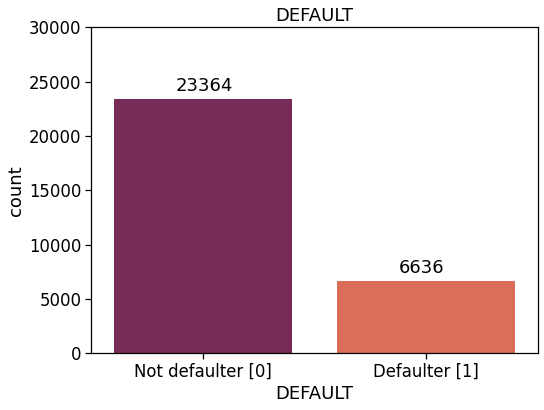

In [12]:
# Plot it.
plt.figure(figsize=(8,6))
sns.set_context('notebook', font_scale=1.5)
defaulter = sns.countplot(x = 'DEFAULT', data = credit_df, palette="rocket")
# Get count of values in each category.
for p in defaulter.patches:
   defaulter.annotate((p.get_height()), (p.get_x()+0.28, p.get_height()+800))

plt.title('DEFAULT')
plt.xticks([0,1],['Not defaulter [0]','Defaulter [1]'])
plt.ylim(0,30000)
plt.show()

**As we can see there is class imbalance in our response variable.**
> **What is class imbalance?**
* **Class imbalance is a problem in machine learning where the total number of one class of data significantly outnumbers the total number of another class of data.**
* **In our situation class 0 outnumbers class 1, i.e there are very few defaulters in the given data.**

## **Independent Variables:**

### **LIMIT_BAL:**

In [13]:
credit_df.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

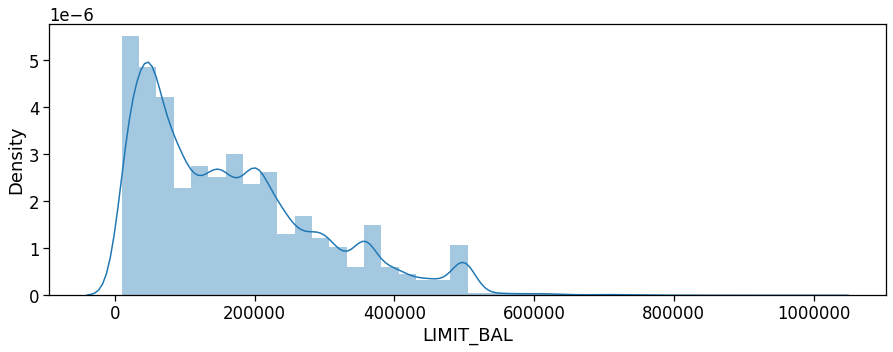

In [14]:
# Check how LIMIT_BAL is ditributed.
plt.figure(figsize=(15,5))
sns.distplot(credit_df['LIMIT_BAL'], bins=40)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

* **LIMIT_BAL** ranges from **10000 to 1000000** with most of the values **less than or equal to 200000.**
* Lets compare these values with DEFAULT.

In [15]:
limit_bin = pd.cut(credit_df.LIMIT_BAL, [10000, 50000, 100000, 150000, 200000, 250000, 500000, 1000000])  
limit_bin.value_counts(sort=False)

(10000, 50000]       7183
(50000, 100000]      4822
(100000, 150000]     3902
(150000, 200000]     3978
(200000, 250000]     2905
(250000, 500000]     6511
(500000, 1000000]     206
Name: LIMIT_BAL, dtype: int64

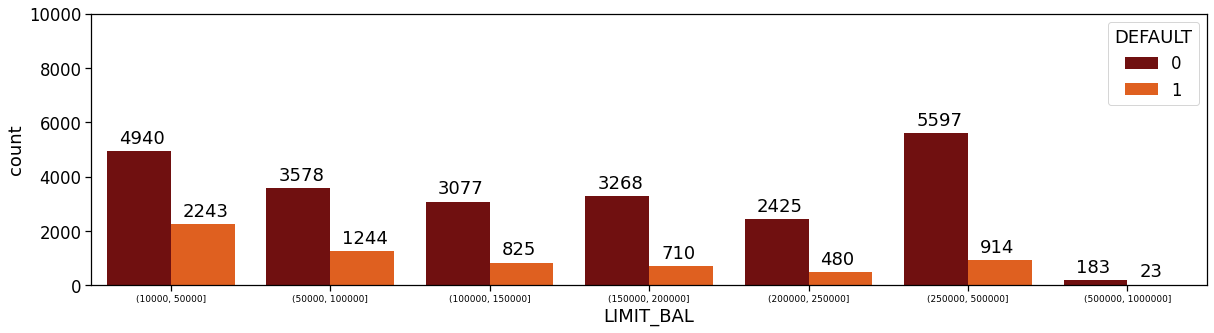

In [16]:
# LIMIT_BAL countplot.
plt.figure(figsize=(20,5))
limit_bal = sns.countplot(data=credit_df, x=limit_bin, hue='DEFAULT', palette = 'gist_heat')
plt.ylim(0,10000)
limit_bal.tick_params(axis="x", labelsize= 9)

for p in limit_bal.patches:
    limit_bal.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))
plt.show()

* **Most of DEFAULTS are from users within the LIMIT of 10000 to 50000, DEFAULTS keep on descreasing as the LIMIT gets higher.**
* **This indirectly means than as the LIMIT increases the number of DEFAULTS decreases.**

### **SEX:**

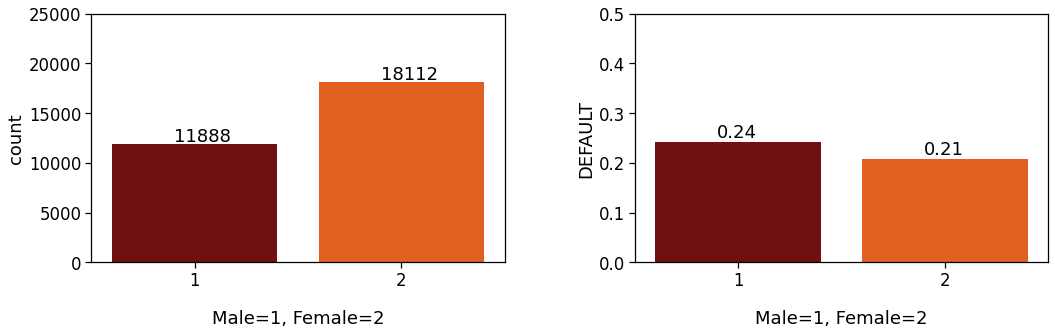

In [17]:
# SEX countplot.
fig,(ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
sex = sns.countplot(credit_df.SEX, palette = 'gist_heat', ax=ax1)
for p in sex.patches:
  sex.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+250))
sex.set_ylim(0,25000)
sex.set_xlabel(xlabel='Male=1, Female=2', labelpad=20)

# SEX vs DEFAULT.
sex2 = sns.barplot(data = credit_df, x='SEX', y='DEFAULT', palette = 'gist_heat', ax=ax2, ci=None)
for p in sex2.patches:
  sex2.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.009))
sex2.set_ylim(0,0.50)
sex2.set_xlabel(xlabel='Male=1, Female=2', labelpad=20)
fig.tight_layout(w_pad=4)
plt.show()

* **There are more Female users compared to males, but the default rate for males are slightly higher than females.**

### **EDUCATION:**

In [18]:
credit_df.EDUCATION.unique()

array([2, 1, 3, 4])

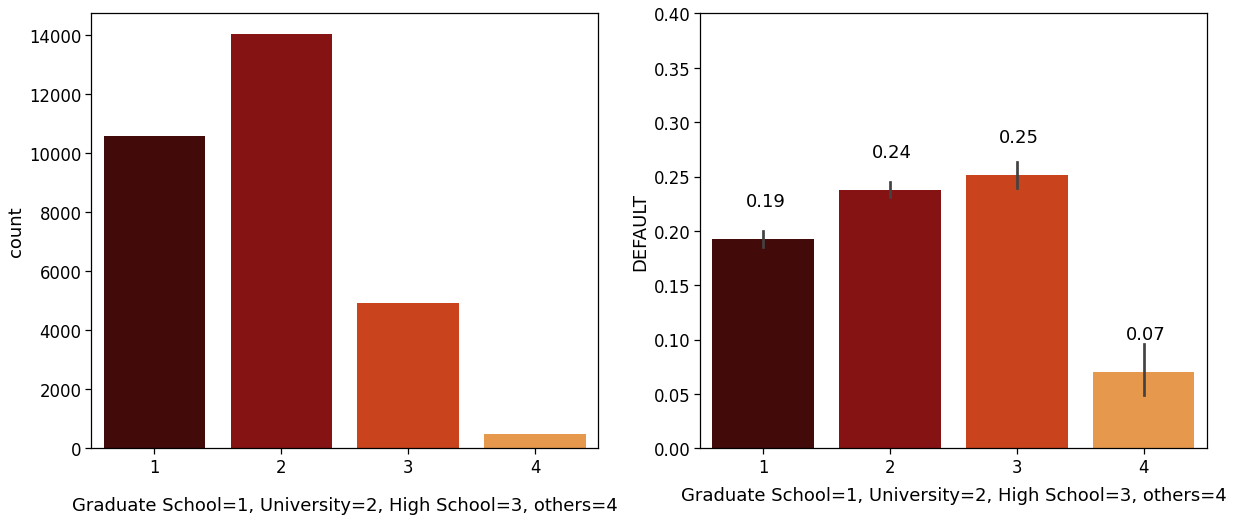

In [19]:
# EDUCATION countplot.
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
edu0 = sns.countplot(credit_df.EDUCATION, ax=ax1, palette='gist_heat')
edu0.set_xlabel(xlabel='Graduate School=1, University=2, High School=3, others=4', labelpad=20)

# EDUCATION vs DEFAULT.
edu = sns.barplot(data=credit_df, x='EDUCATION', y='DEFAULT', palette = 'gist_heat', ax=ax2)
edu.set_ylim(0, 0.4)
for p in edu.patches:
  edu.annotate("%.2f" %(p.get_height()), (p.get_x()+0.26, p.get_height()+0.03))
edu.set_xlabel(xlabel='Graduate School=1, University=2, High School=3, others=4', labelpad=10)

plt.show()

* **Maximum number of users have either gone to universities or graduated.**
* **Higher level of education lead to lower level of defaults.**
* **Others has the least level of defaults.**

### **MARRIAGE:**

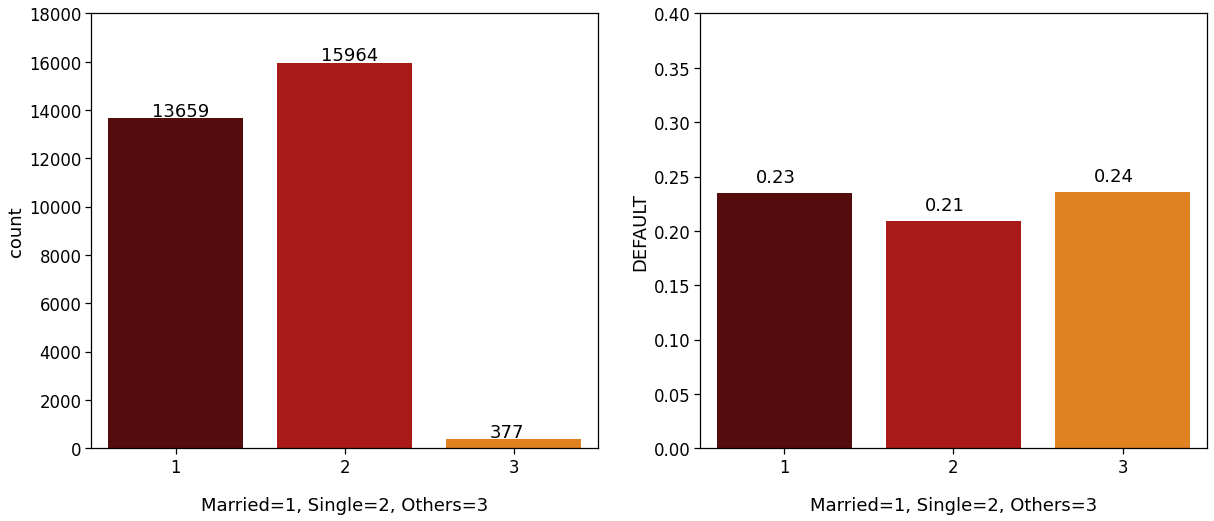

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
m1 = sns.countplot(credit_df.MARRIAGE, ax=ax1, palette='gist_heat')
m1.set_ylim(0,18000)
for p in m1.patches:
  m1.annotate((p.get_height()), (p.get_x()+0.26, p.get_height()+100))
m1.set_xlabel(xlabel='Married=1, Single=2, Others=3', labelpad=20)

# MARRIAGE vs DEFAULT.
m2 = sns.barplot(data=credit_df, x='MARRIAGE', y='DEFAULT', ax=ax2, palette='gist_heat', ci=None)
m2.set_ylim(0,0.40)
for p in m2.patches:
  m2.annotate("%.2f" %(p.get_height()), (p.get_x()+0.23, p.get_height()+0.01))
m2.set_xlabel(xlabel='Married=1, Single=2, Others=3', labelpad=20)
plt.show()

* Most of the users are either single or married.
* Among the three categories **Others** has the highest percentage of DEFAULTS followed by **Married** and **Single** users.

### **AGE:**

In [21]:
credit_df.AGE.describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

* **Minimum AGE of aa user is 21 and Maximum AGE is 79.**
* **Lets put them into bins and get some visuals.**

In [22]:
age_bin = pd.cut(credit_df.AGE, [20,30,40,50,60,70,80])
age_bin.value_counts()

(20, 30]    11013
(30, 40]    10713
(40, 50]     6005
(50, 60]     1997
(60, 70]      257
(70, 80]       15
Name: AGE, dtype: int64

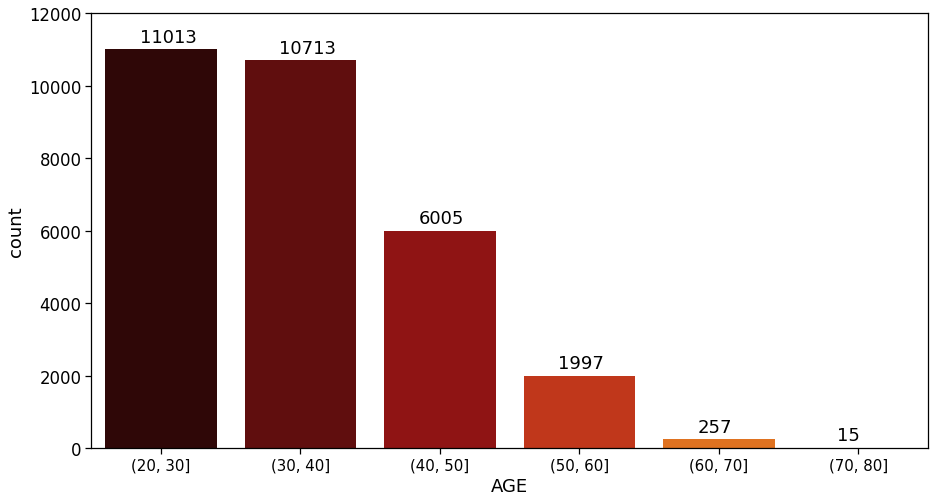

In [23]:
# AGE countplot.
plt.figure(figsize=(15,8))
limit_bal = sns.countplot(data=credit_df, x=age_bin, palette = 'gist_heat')
plt.ylim(0,12000)
limit_bal.tick_params(axis="x", labelsize= 15)

for p in limit_bal.patches:
    limit_bal.annotate((p.get_height()), (p.get_x()+0.25, p.get_height()+200))
plt.show()

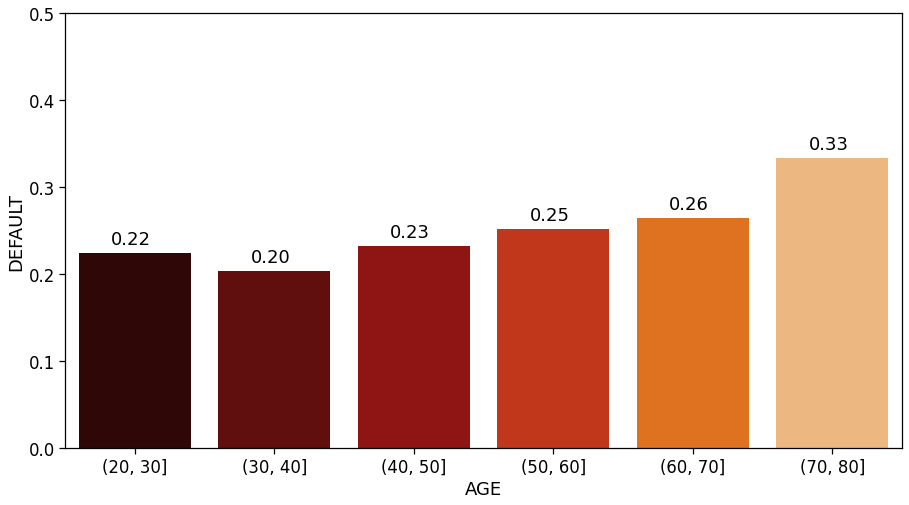

In [24]:
# AGE vs DEFAULT.
plt.figure(figsize=(15,8))
m2 = sns.barplot(data=credit_df, x=age_bin, y='DEFAULT', palette='gist_heat', ci=None)
m2.set_ylim(0,0.50)
for p in m2.patches:
  m2.annotate("%.2f" %(p.get_height()), (p.get_x()+0.23, p.get_height()+0.01))
plt.show()

* **Maximum number of users are within the age group 20 t0 50.**
* **As the age increases the default rates increase, least number of are observed in the age group [30,40]**

### **History of Past Payment: [ PAY_SEPT, PAY_AUG, PAY_JUL, PAY_JUN, PAY_MAY, PAY_APR ]**

**-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above.**

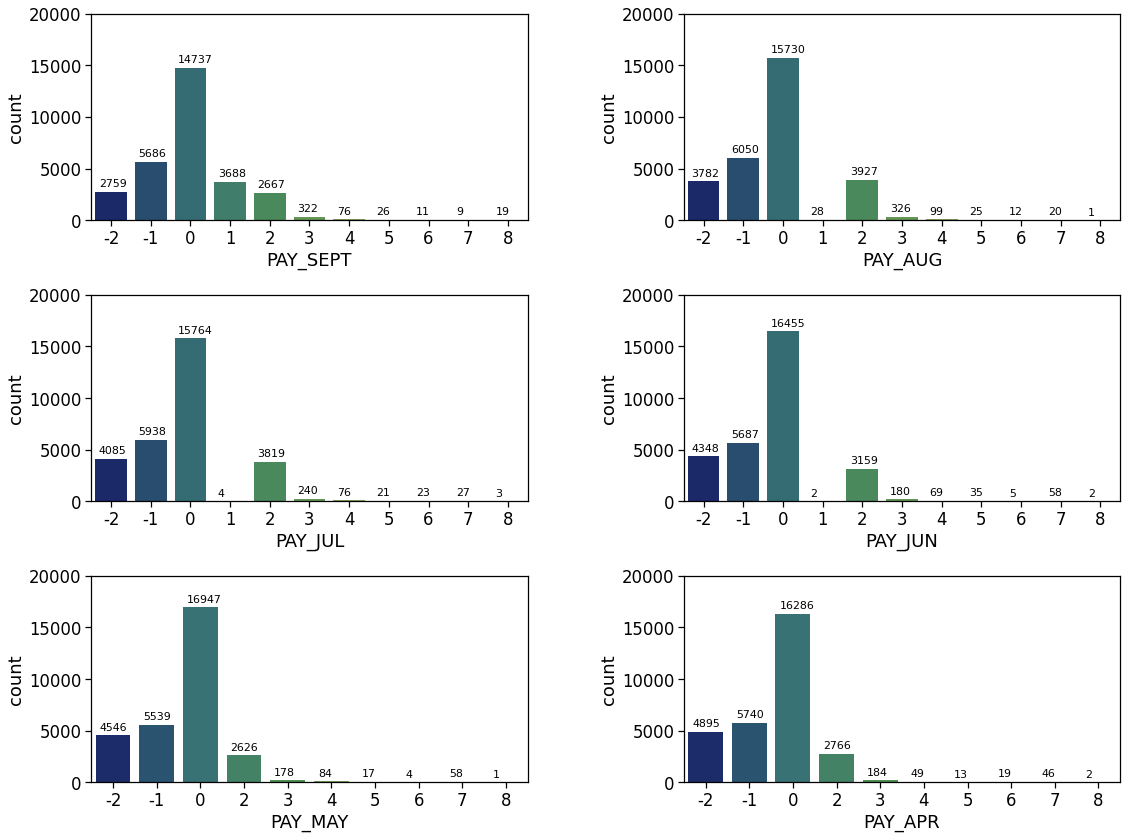

In [25]:
# History of Past Payment countplots.
hist_pay = [ 'PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']
plt.figure(figsize=(16,12))
for n, i in enumerate(hist_pay):
  plt.subplot(3,2,n+1)
  ax = sns.countplot(credit_df.loc[:, i],  palette='gist_earth')
  plt.ylim(0,20000)
  plt.tight_layout(h_pad=1, w_pad=4)

  for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.09, p.get_height()+500), fontsize = 11)

plt.show()

**As we can see most of the users are paying their bills on time, but there are few users who have delayed their payments.**

In [26]:
# # Subset a dataframe with the records that have default

# has_default = df[df['HAS_DEF']== 1]
# default_trend = has_default[['PAY_6','PAY_5','PAY_4','PAY_3','PAY_2','PAY_1']].sum(axis=0)

# # Draw a line chart to show the trend. The lower the number, the shorter delayed payment
# fig,ax = plt.subplots()
# ax.plot(default_trend)
# plt.xticks(['PAY_6','PAY_5','PAY_4','PAY_3','PAY_2','PAY_1'],['Apr','May','Jun','Jul','Aug','Sep'])

# plt.xlabel('Months in 2005',fontweight='bold')
# plt.ylabel('Total delayed months',fontweight='bold')
# plt.title('Delayed payment trend',fontweight='bold')

# plt.show()

### **Amount of Bill Statement: [ BILL_AMT_SEPT, BILL_AMT_AUG,  BILL_AMT_JUL,  BILL_AMT_JUN,  BILL_AMT_MAY, BILL_AMT_APR ]**

In [27]:
credit_df. BILL_AMT_SEPT.describe()

count     30000.000000
mean      51223.330900
std       73635.860576
min     -165580.000000
25%        3558.750000
50%       22381.500000
75%       67091.000000
max      964511.000000
Name: BILL_AMT_SEPT, dtype: float64

**Since there is a wide range of values ranging from -165580 to 1000000 it will be hard to plot it directly so lets put them into bins.**

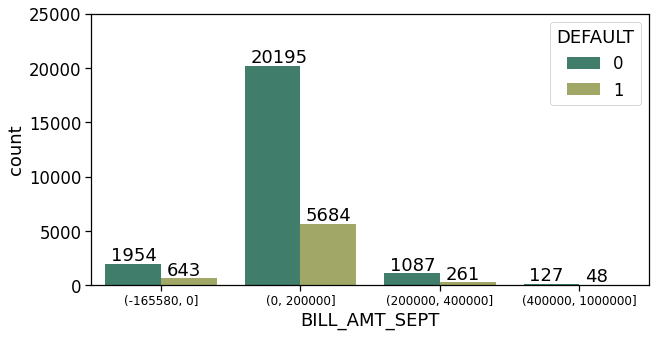

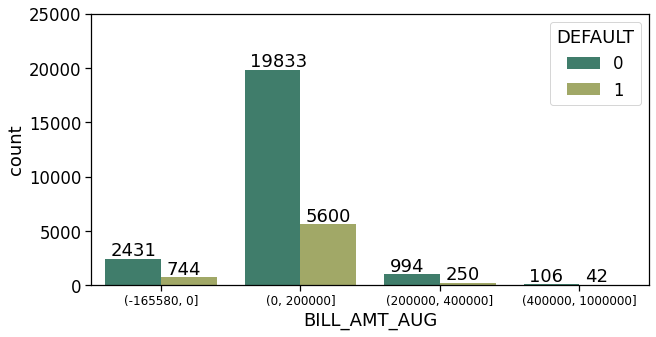

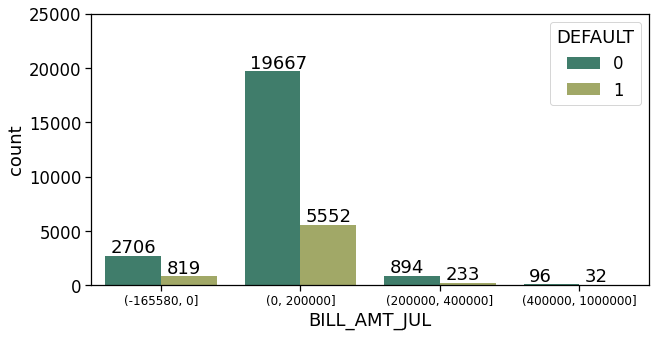

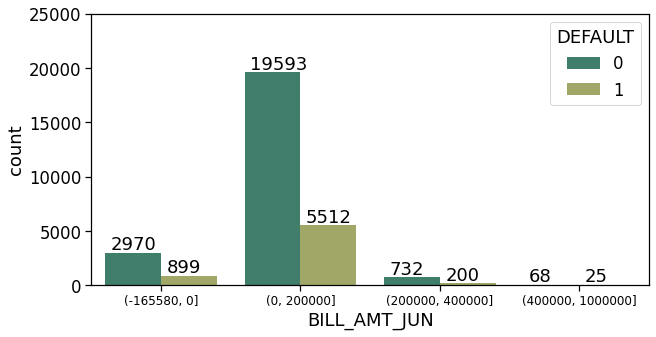

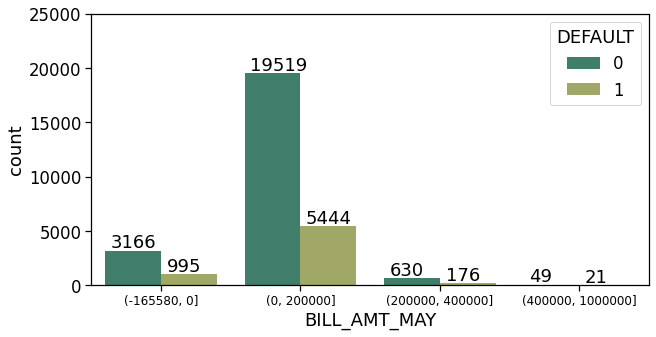

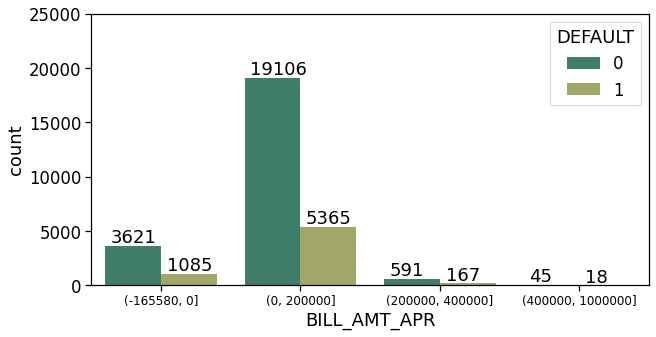

In [28]:
# Amount of Bill Statement countplots.
bill_amt = ['BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR']
for i in bill_amt:
  bill_bins = pd.cut(credit_df[i], [-165580,0,200000,400000,1000000])
  plt.figure(figsize=(10,5))
  bill_plot = sns.countplot(data=credit_df, x=bill_bins, hue='DEFAULT', palette = 'gist_earth')
  plt.ylim(0,25000)
  bill_plot.tick_params(axis="x", labelsize= 12)

  for p in bill_plot.patches:
    bill_plot.annotate((p.get_height()), (p.get_x()+0.04, p.get_height()+300))
plt.show()

**There are more DEFAULTS in the range 0 to 200000.**

### **Amount of Previous Payment: [ PAY_AMT_SEPT, PAY_AMT_AUG, PAY_AMT_JUL, PAY_AMT_JUN, PAY_AMT_MAY, PAY_AMT_APR ]**

In [29]:
credit_df['PAY_AMT_SEPT'].describe()

count     30000.000000
mean       5663.580500
std       16563.280354
min           0.000000
25%        1000.000000
50%        2100.000000
75%        5006.000000
max      873552.000000
Name: PAY_AMT_SEPT, dtype: float64

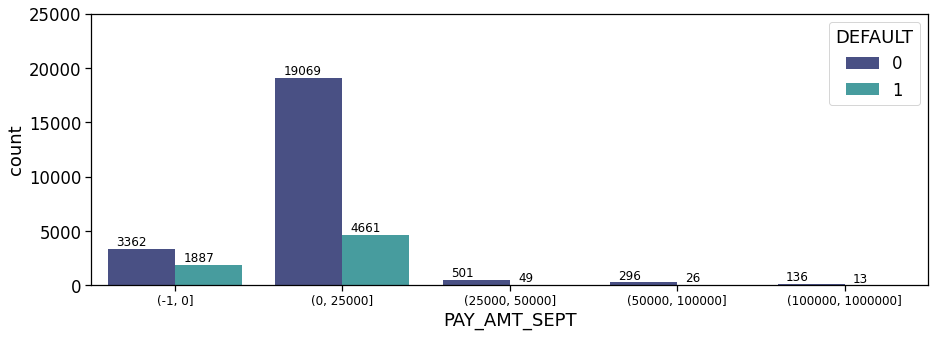

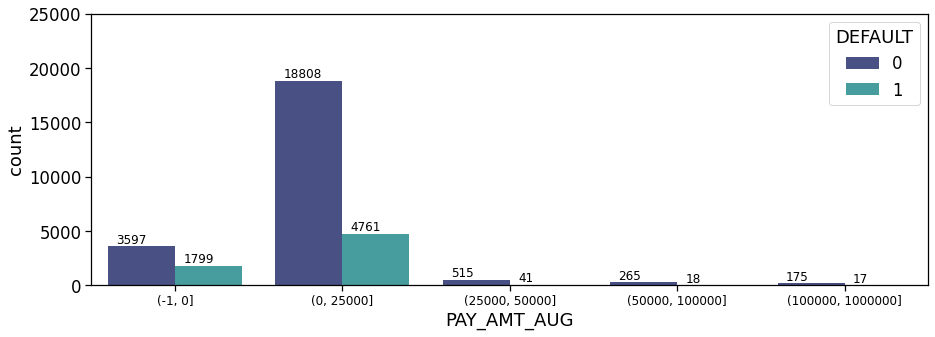

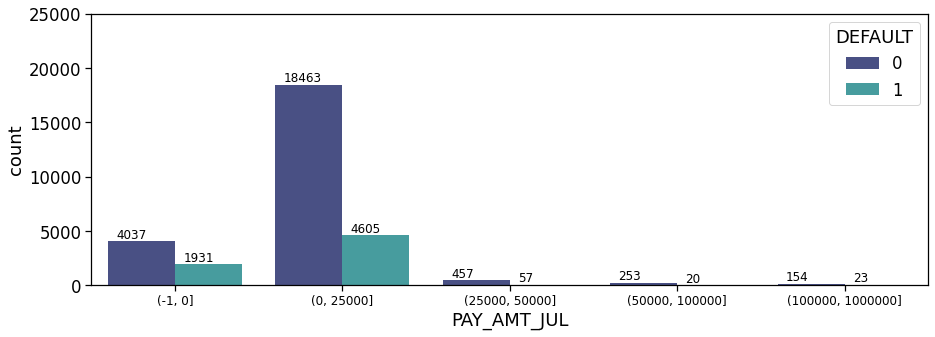

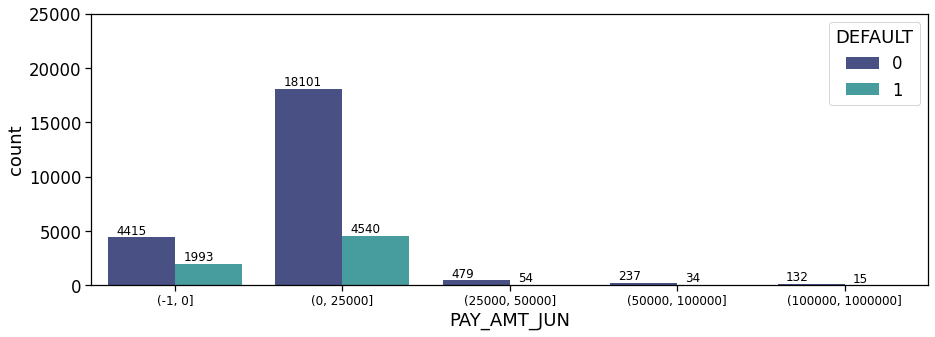

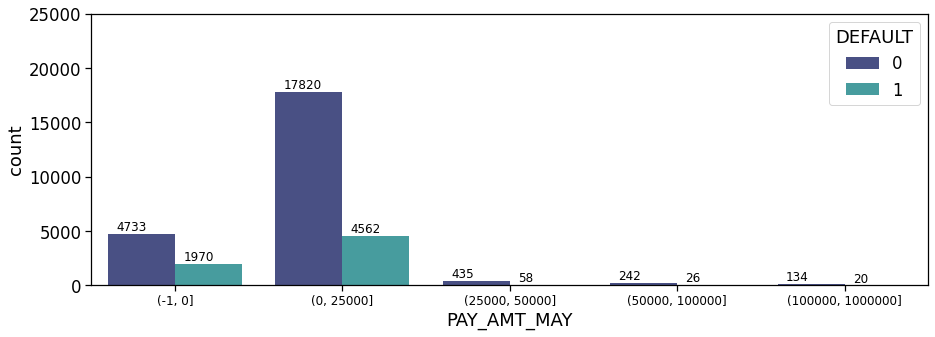

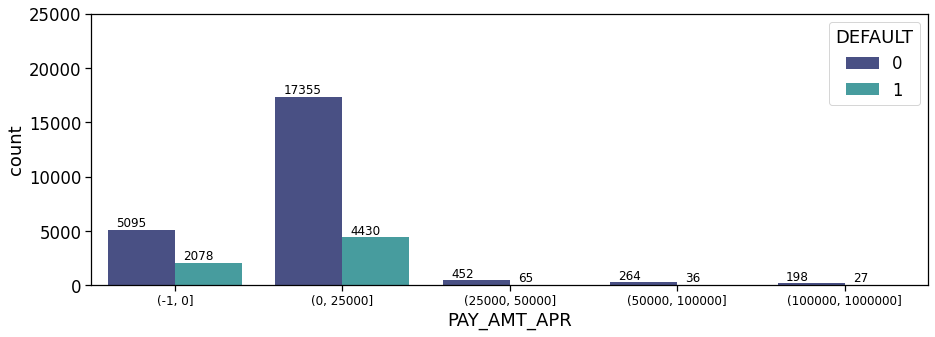

In [30]:
# Amount of Previous Pay countplots.
previous_pay = ['PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']
for i in previous_pay:
  previous_bins = pd.cut(credit_df[i], [-1,0,25000,50000,100000,1000000])
  plt.figure(figsize=(15,5))
  previous_plot = sns.countplot(data=credit_df, x=previous_bins, hue='DEFAULT', palette = 'mako')
  plt.ylim(0,25000)
  previous_plot.tick_params(axis="x", labelsize= 12)

  for p in previous_plot.patches:
    previous_plot.annotate((p.get_height()), (p.get_x()+0.05, p.get_height()+300), fontsize=12)
plt.show()

* **Less DEFAULTS can be observed where higher amounts were payed in previous months.**
* **Most of the DEFAULTS are present in the cases where less then 25000 were payed.**

### **Correlation Between Variables:**

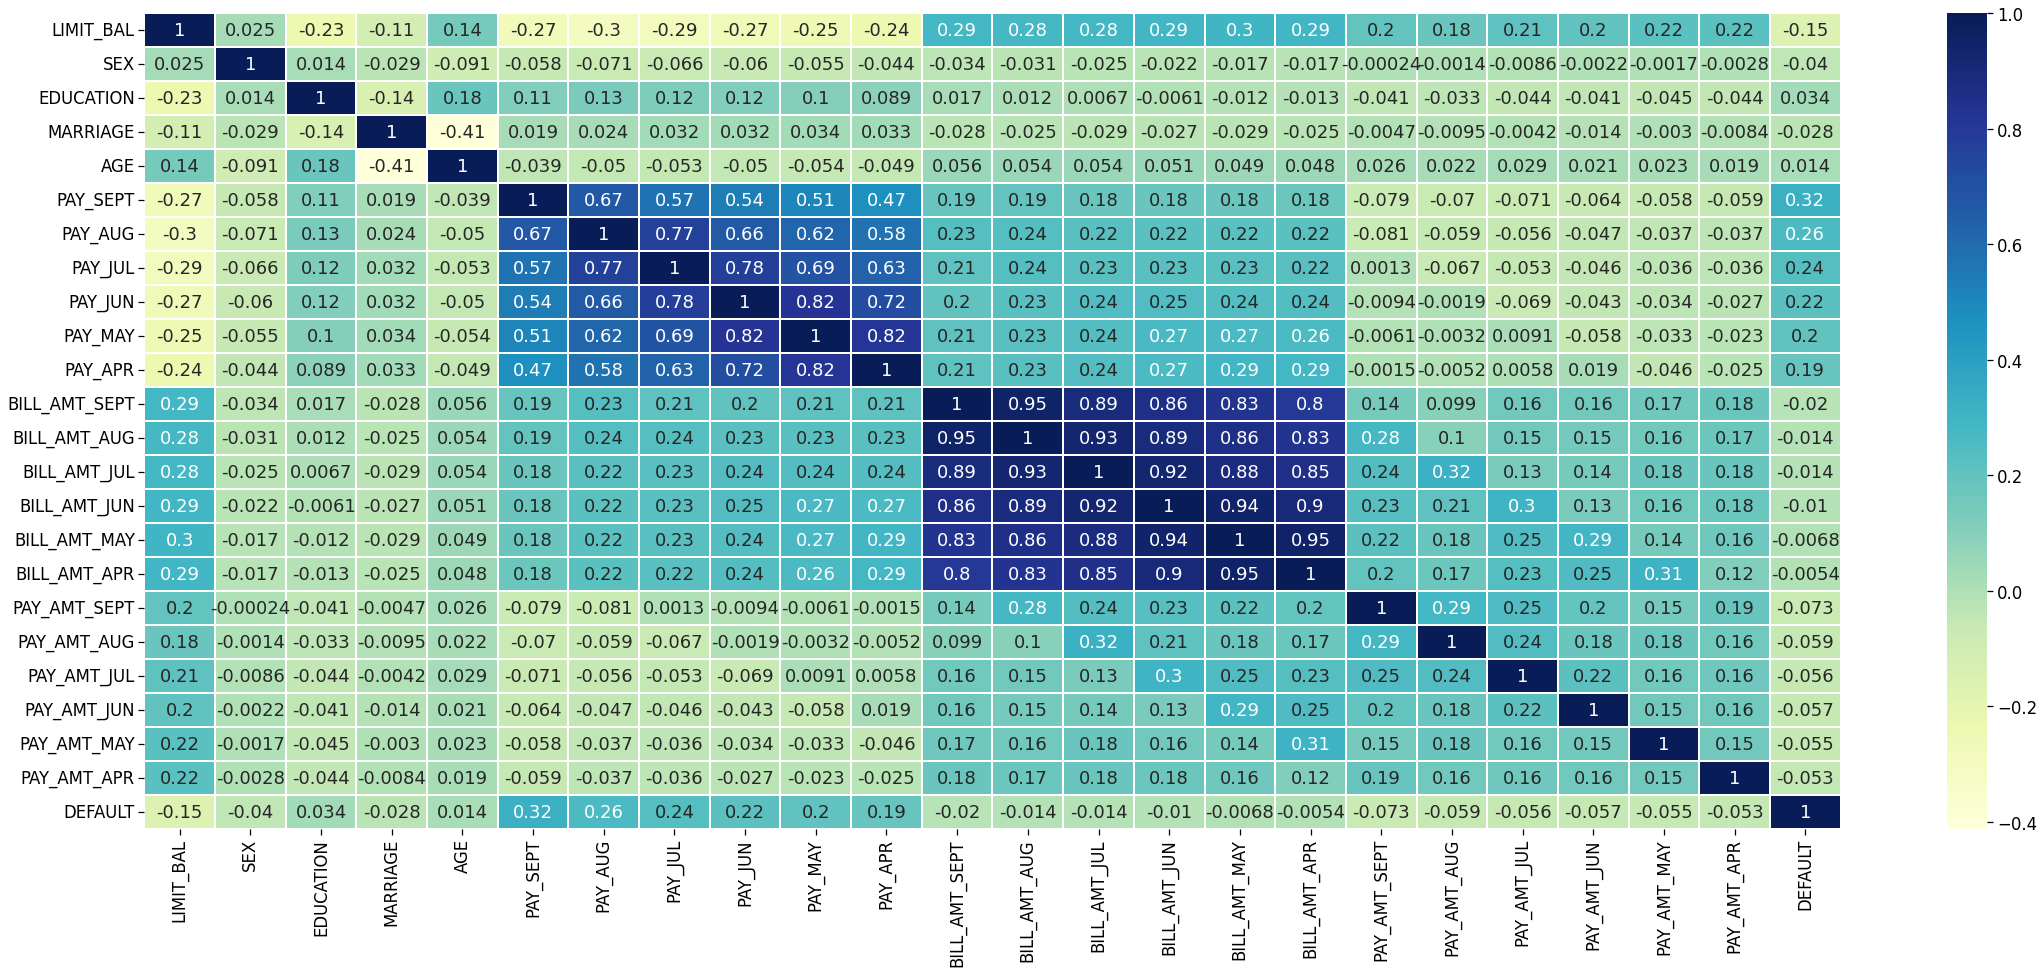

In [31]:
# Check correlation between variables using Heatmap. [id not included.]
corr_data = credit_df.iloc[:,1:].corr()
plt.figure(figsize=(38,15))
sns.heatmap(corr_data, annot=True, linewidths=1, cmap='YlGnBu')
plt.show()

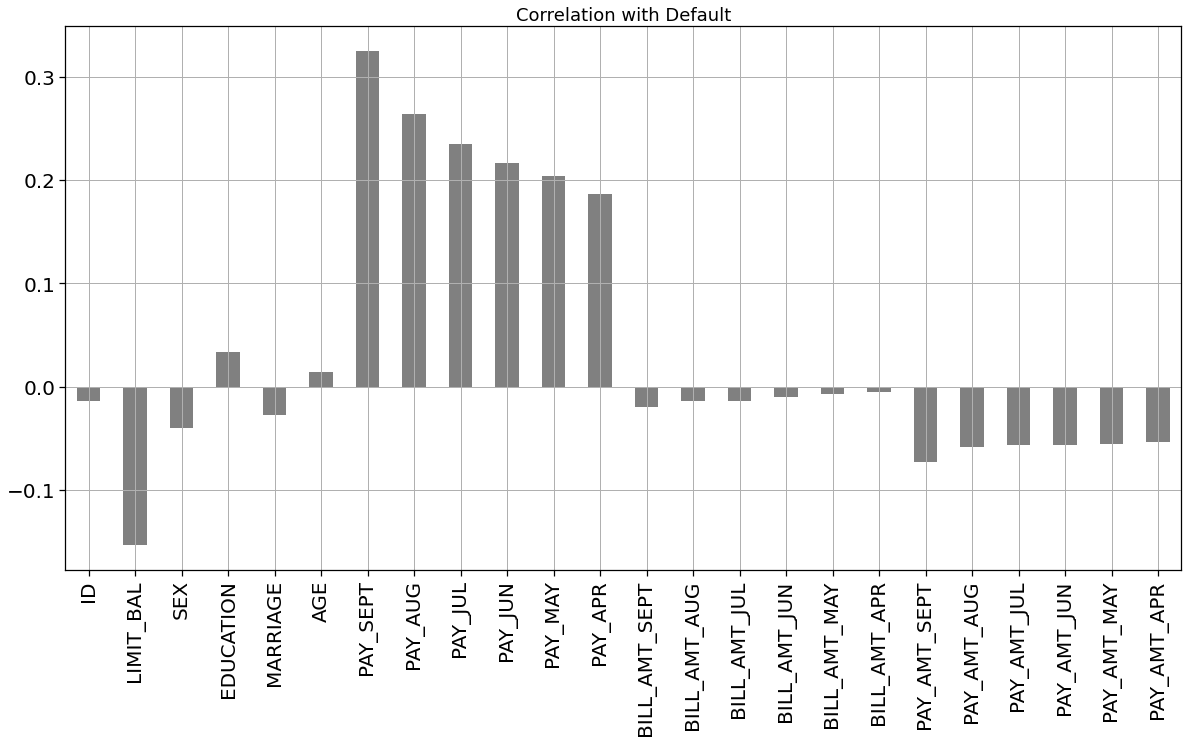

In [32]:
X = credit_df.drop(['DEFAULT'],axis=1)
X.corrwith(credit_df['DEFAULT']).plot.bar(figsize = (20, 10), title = "Correlation with Default", 
                                        fontsize = 20,rot = 90, grid = True , color ='grey')
plt.show()

# **Data Preparation:**

In [33]:
# Create a copy of the dataset befor we do any modifications.
df_copy = credit_df.copy()

# Drop ID 
df_copy = df_copy.drop('ID', axis=1)

In [34]:
# Get dummies for EDUCATION and MARRIAGE.
df_copy = pd.get_dummies(df_copy,columns=['EDUCATION','MARRIAGE'])

# Drop to avoid dummy variable trap.
df_copy.drop(['EDUCATION_4','MARRIAGE_3'],axis = 1, inplace = True)

In [35]:
# Get One Hot Encoding for few variables.

columns = ['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']

df_copy = pd.get_dummies(df_copy,columns=columns, drop_first=True)

In [36]:
# Seperate the dependent and independent
X = df_copy.drop(columns=['DEFAULT'], axis = 1)
y = df_copy['DEFAULT']

In [37]:
from collections import Counter
counter = Counter(y)

In [38]:
 # we will use estimate value to balance the data in xgb classifier.
estimate = counter[0] / counter[1] 
print('Estimate: %.3f' % estimate)

Estimate: 3.521


In [39]:
# Split the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5, stratify=y)

In [40]:
# Scale the data.
sc = StandardScaler()
# Standardize our X data.
X_train_sc = sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

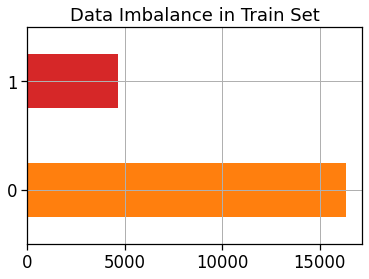

In [41]:
# Now lets check the imbalance in our dependent varieble.  TRAIN SET
y_train.value_counts().plot(kind = 'barh', grid = True, color=['tab:orange', 'tab:red'])
plt.title('Data Imbalance in Train Set')
plt.show()

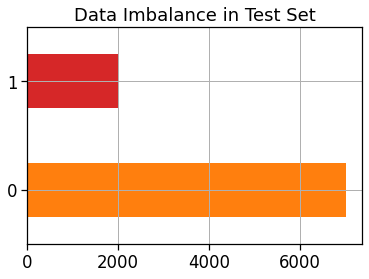

In [42]:
# Now lets check the imbalance in our dependent varieble.  TEST SET
y_test.value_counts().plot(kind = 'barh', grid = True, color=['tab:orange', 'tab:red'])
plt.title('Data Imbalance in Test Set')
plt.show()

*  **The above two plots show how imbalanced our data is.** 
* **Class_1 i.e the number of DEFAULTS is relatively lower than NON-DEFAULTS, this is normal as DEFAULTS do not happen on a regular basis.**

# **Model Building:**

## **Since the dataset is imbalanced we will follow the below steps to get the best performing model.**
**1.**  **Define the models we will be using.**

**2.**  **Create a function to build and evaluate the defined models.**

**3.**  **Since the data is imbalanced we will test all the models on the imbalanced data as well as the upsampled data using SMOTE.**

**4.**  **Select the best performing models (best in terms of f1 score since the data is imbalanced) and do some hyperparameter tuning.**

**5.**  **Perform TRESHOLD MOVING to find the optimum threshold which will  give us the lowest false positive rate and the highest true positive rate (we need high recall).**



### **Define Models.**

**Models we will be using:**
* LogisticRegression
* XGBClassifier
* KNeighborsClassifier
* RandomForestClassifier
* ExtraTreesClassifier


In [43]:
# Define the models on default hyperparameters.
lr_model   = LogisticRegression()

xgb_model  = XGBClassifier(scale_pos_weight=3.521)  # This model will be used for Imbalanced data.
xgb_model_smote  = XGBClassifier()  # This will be used with SMOTETomek.

knn_model  = KNeighborsClassifier()
rf_model   = RandomForestClassifier()
etc_model  = ExtraTreesClassifier()

In [44]:
# List of models for Non SMOTE.
models_non_smote = [lr_model, xgb_model, knn_model, rf_model, etc_model]
models_smote = [lr_model, xgb_model_smote, knn_model, rf_model, etc_model]

### **Create function to evaluate models.**

In [45]:
dict_train={}
dict_test={}
lst_imp=[]
# fuction for calculation the eveluation matrix
def score_model(test_models,X_train,y_train,X_test,y_test):
  df_columns=[]
  df=pd.DataFrame(columns=df_columns)
  i=0
  #read model one by one
  for model in test_models:
      model.fit(X_train,y_train)
      y_pred_test=model.predict(X_test)
      y_pred_train=model.predict(X_train)
 
 #compute metrics
 # Accuracy.
      train_accuracy=accuracy_score(y_train,y_pred_train)
      test_accuracy=accuracy_score(y_test,y_pred_test)
# Precision.
      precision_score_train=precision_score(y_train,y_pred_train)
      precision_score_test=precision_score(y_test,y_pred_test)
# Recall.
      recall_score_train=recall_score(y_train,y_pred_train)
      recall_score_test=recall_score(y_test,y_pred_test)
# ROC-AUC.
      train_auc = roc_auc_score(y_train,y_pred_train)
      test_auc = roc_auc_score(y_test,y_pred_test)
# ROC curve.
      fp, tp, th = roc_curve(y_test, y_pred_test)
      fptrain, tptrain, th_train = roc_curve(y_train, y_pred_train)
# F1 Score.
      f1_score_train = metrics.f1_score(y_train,y_pred_train)
      f1_score_test = metrics.f1_score(y_test,y_pred_test)
      
      #insert in dataframe
      df.loc[i,"Model Name"]=model.__class__.__name__

      df.loc[i,"Train Accuracy"]=round(train_accuracy,2)
      df.loc[i,"Test Accuracy"]=round(test_accuracy,2)

      df.loc[i,"Precision Train"]=round(precision_score_train,2)
      df.loc[i,"Precision Test"]=round(precision_score_test,2)

      df.loc[i,"Recall Train"]=round(recall_score_train,2)
      df.loc[i,"Recall test"]=round(recall_score_test,2)

      df.loc[i,"ROC AUC Train"]=round(train_auc,2)
      df.loc[i,"ROC AUC Test"]=round(test_auc,2)

      df.loc[i,'AUC Train'] = auc(fptrain, tptrain)
      df.loc[i,'AUC Test'] = auc(fp, tp)

      df.loc[i,'F1 Score Train'] = round(f1_score_train,2)
      df.loc[i,'F1 Score Test'] = round(f1_score_test,2)
      
      #inserted in dictionary
      dict_train[model.__class__.__name__]=confusion_matrix(y_train,y_pred_train)
      dict_test[model.__class__.__name__]=confusion_matrix(y_test,y_pred_test)

      i+=1
  # Return the data frame and dictionary
  return df,dict_train,dict_test

**Train and Test on Imbalanced Data.**

In [46]:
# Train the above models using the function we created. [IMBALANCED DATA]
result_df,dict_train,dict_test=score_model(models_non_smote,X_train_sc,y_train,X_test_sc,y_test)

.

**Train and Test on Upsampled Data.**

* **To remove the class imbalance we will use SMOTE to oversample our data:**
* **SMOTE stands for Synthetic Minority Over-sampling Technique, it creates new synthetic points in order to have an equal balance of the classes.**

**Understanding SMOTE:**

* **Solving the Class Imbalance:** SMOTE creates synthetic points from the minority class in order to reach an equal balance between the minority and majority class.
* **Location of the synthetic points:** SMOTE picks the distance between the closest neighbors of the minority class, in between these distances it creates synthetic points.

In [47]:
from imblearn.combine import SMOTETomek  # SMOTETomek combines oversampling and undersampling using SMOTE and Tomek links.
smt = SMOTETomek(random_state=5, sampling_strategy='minority')
X_smt, y_smt = smt.fit_resample(X_train_sc, y_train)

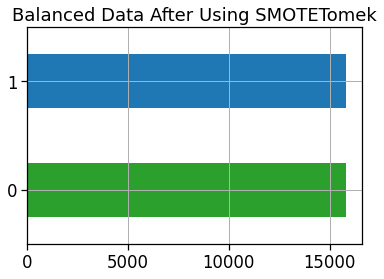

In [48]:
y_smt.value_counts().plot(kind='barh', grid = True, color=['tab:green', 'tab:blue'])
plt.title('Balanced Data After Using SMOTETomek')
plt.show()

In [49]:
# Train the above models using the function we created. [OVERSAMPLED DATA]
result_df_smt,dict_train_smt,dict_test_smt=score_model(models_smote,X_smt,y_smt,X_test_sc,y_test)

**Print the results.**

In [50]:
# Imbalanced Data.
result_df

,Model Name,Train Accuracy,Test Accuracy,Precision Train,Precision Test,Recall Train,Recall test,ROC AUC Train,ROC AUC Test,AUC Train,AUC Test,F1 Score Train,F1 Score Test
0,LogisticRegression,0.82,0.82,0.68,0.69,0.36,0.36,0.65,0.66,0.654963,0.655654,0.47,0.47
1,XGBClassifier,0.77,0.76,0.48,0.46,0.66,0.63,0.73,0.71,0.730832,0.710229,0.56,0.53
2,KNeighborsClassifier,0.85,0.79,0.73,0.54,0.48,0.35,0.71,0.63,0.713114,0.634276,0.58,0.43
3,RandomForestClassifier,1.00,0.82,1.00,0.66,1.00,0.37,1.00,0.66,0.998970,0.658223,1.00,0.47
4,ExtraTreesClassifier,1.00,0.81,1.00,0.60,1.00,0.36,1.00,0.65,0.998816,0.646680,1.00,0.45


In [51]:
# Upsampled Data.
result_df_smt

,Model Name,Train Accuracy,Test Accuracy,Precision Train,Precision Test,Recall Train,Recall test,ROC AUC Train,ROC AUC Test,AUC Train,AUC Test,F1 Score Train,F1 Score Test
0,LogisticRegression,0.72,0.77,0.78,0.48,0.60,0.59,0.72,0.71,0.715081,0.705841,0.68,0.53
1,XGBClassifier,0.81,0.80,0.86,0.55,0.74,0.51,0.81,0.69,0.811108,0.694797,0.80,0.53
2,KNeighborsClassifier,0.87,0.67,0.81,0.36,0.96,0.62,0.87,0.65,0.869054,0.650029,0.88,0.45
3,RandomForestClassifier,1.00,0.80,1.00,0.55,1.00,0.49,1.00,0.69,0.999779,0.686130,1.00,0.52
4,ExtraTreesClassifier,1.00,0.79,1.00,0.53,1.00,0.44,1.00,0.66,0.999779,0.661981,1.00,0.48


**Confusion Matrix for all the models.**

In [52]:
# Confusion matrix for Imbalanced data.
for key,value in dict_test.items():
  print(f'For {key} Confusion matrix is :')
  print(value)

For LogisticRegression Confusion matrix is :
[[5744 1265]
 [ 812 1179]]
For XGBClassifier Confusion matrix is :
[[6163  846]
 [ 975 1016]]
For KNeighborsClassifier Confusion matrix is :
[[4768 2241]
 [ 757 1234]]
For RandomForestClassifier Confusion matrix is :
[[6214  795]
 [1024  967]]
For ExtraTreesClassifier Confusion matrix is :
[[6224  785]
 [1123  868]]


In [53]:
# Confusion matrix for Upsampled data.
for key,value in dict_test_smt.items():
  print(f'For {key} Confusion matrix is :')
  print(value)

For LogisticRegression Confusion matrix is :
[[5744 1265]
 [ 812 1179]]
For XGBClassifier Confusion matrix is :
[[6163  846]
 [ 975 1016]]
For KNeighborsClassifier Confusion matrix is :
[[4768 2241]
 [ 757 1234]]
For RandomForestClassifier Confusion matrix is :
[[6214  795]
 [1024  967]]
For ExtraTreesClassifier Confusion matrix is :
[[6224  785]
 [1123  868]]


## **Points to be noted:**
* On both, Imbalanced and Upsampled data,  Logistic regression, XGB, and Random Forest Classifiers give better results than others.
* Random Forest is overfitting. We can overcome it by hyperparameter tuning.
* We will also perform hyperparameter tuning on xgb classifier with imbalanced  data since it gave the highest recall in test set.


# **Hyperparameter Tuning:**

**We will use GridSearchCV to perform the hyperparameter tuning and cross validations.**

**Logistic Regression:**

In [54]:
# Logistic Regression:
lr_model = LogisticRegression()   #, booster='dart',scale_pos_weight=3.5208, max_depth=3

# Define the hyperparameter dict.
lr_param_grid = {'penalty' : ['l1', 'l2'],
                 'C' : np.logspace(-4, 4, 20),
                 'solver' : ['liblinear', 'saga']
                  }

# Define stratified_kfold.
stratified_kfold = StratifiedKFold(n_splits=3,
                                       shuffle=True,
                                       random_state=11)

lr_grid_search = GridSearchCV(estimator=lr_model, param_grid=lr_param_grid, cv=stratified_kfold, scoring='f1', verbose=1)

# Implement GridSearch.
lr_grid_search.fit(X_smt, y_smt)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=11, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='f1', verbose=1)

In [56]:
# Get best estimators.
lr_grid_search.best_estimator_

LogisticRegression(C=0.0001, solver='liblinear')

In [55]:
# Define the optimum model.
lr_optimal_model = lr_grid_search.best_estimator_

In [57]:
# Predict the values.
y_pred_lr=lr_optimal_model.predict(X_test_sc)
print(confusion_matrix(y_test,y_pred_lr))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred_lr)))
print("Precision Score {}".format(precision_score(y_test,y_pred_lr)))
print("Recall Score {}".format(recall_score(y_test,y_pred_lr)))
print("F1 Score {}".format(metrics.f1_score(y_test,y_pred_lr)))
print(classification_report(y_test,y_pred_lr, ))
lr_list = []

[[5649 1360]
 [ 795 1196]]
Accuracy Score 0.7605555555555555
Precision Score 0.4679186228482003
Recall Score 0.6007031642390759
F1 Score 0.5260611392126678
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      7009
           1       0.47      0.60      0.53      1991

    accuracy                           0.76      9000
   macro avg       0.67      0.70      0.68      9000
weighted avg       0.79      0.76      0.77      9000



**XG Boost on Imbalanced dataset:**

In [58]:
# XG Boost:
xgb_imb_model = XGBClassifier(scale_pos_weight=3.521) 

# Define the hyperparameter dict.
xgb_imb_param_grid = {
                  'colsample_bytree': [0.5,1,1.5,2],
                  'gamma': [0.1, 0.2, 0.3, 0.4, 0.5],
                  'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
                  'max_depth': [3, 4, 5, 6, 7],
                  'n_estimators': [100,200, 400, 600, 800],
                  'subsample': [0.5,1,1.5,2]
                  }

# Define stratified_kfold.
stratified_kfold = StratifiedKFold(n_splits=3,
                                       shuffle=True,
                                       random_state=11)

xgb_imb_grid_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=xgb_imb_param_grid, cv=stratified_kfold, scoring='f1', verbose=1,)

# Implement GridSearch.
xgb_imb_grid_search.fit(X_train_sc, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=11, shuffle=True),
                   estimator=XGBClassifier(scale_pos_weight=3.521),
                   param_distributions={'colsample_bytree': [0.5, 1, 1.5, 2],
                                        'gamma': [0.1, 0.2, 0.3, 0.4, 0.5],
                                        'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                          0.5],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'n_estimators': [100, 200, 400, 600,
                                                         800],
                                        'subsample': [0.5, 1, 1.5, 2]},
                   scoring='f1', verbose=1)

In [59]:
# Get best estimators.
xgb_imb_grid_search.best_estimator_

XGBClassifier(colsample_bytree=0.5, gamma=0.5, max_depth=4,
              scale_pos_weight=3.521)

In [60]:
# Define the optimum model.
# colsample_bytree=0.5, gamma=0.5, max_depth=4,scale_pos_weight=3.521
xgb_imb_optimal_model = xgb_imb_grid_search.best_estimator_

In [61]:
# Predict the values.
y_pred_xgb_imb=xgb_imb_optimal_model.predict(X_test_sc)
print(confusion_matrix(y_test,y_pred_xgb_imb))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred_xgb_imb)))
print("Precision Score {}".format(precision_score(y_test,y_pred_xgb_imb)))
print("Recall Score {}".format(recall_score(y_test,y_pred_xgb_imb)))
print("F1 Score {}".format(metrics.f1_score(y_test,y_pred_xgb_imb)))
print(classification_report(y_test,y_pred_xgb_imb, ))

[[5494 1515]
 [ 726 1265]]
Accuracy Score 0.751
Precision Score 0.4550359712230216
Recall Score 0.6353591160220995
F1 Score 0.5302871515405576
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      7009
           1       0.46      0.64      0.53      1991

    accuracy                           0.75      9000
   macro avg       0.67      0.71      0.68      9000
weighted avg       0.79      0.75      0.76      9000



**XG Boost on Upsampled (Balanced Using SMOTETomek) Dataset.**

In [62]:
# XG Boost:
xgb_model = XGBClassifier()

# Define the hyperparameter dict.
xgb_param_grid = {
                  'colsample_bytree': np.array([0.5,1,1.5,2]),
                  'gamma': np.array([0.1, 0.2, 0.3, 0.4, 0.5]),
                  'learning_rate': np.array([0.1, 0.2, 0.3, 0.4, 0.5]),
                  'max_depth': [3, 4, 5, 6, 7],
                  'n_estimators': np.array([100,200, 400, 600, 800]),
                  'subsample': np.array([0.5,1,1.5,2])
                  }

# Define stratified_kfold.
stratified_kfold = StratifiedKFold(n_splits=3,
                                       shuffle=True,
                                       random_state=11)

xgb_grid_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=xgb_param_grid, cv=stratified_kfold, scoring='f1', verbose=1)

# Implement GridSearch.
xgb_grid_search.fit(X_train_sc, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=11, shuffle=True),
                   estimator=XGBClassifier(),
                   param_distributions={'colsample_bytree': array([0.5, 1. , 1.5, 2. ]),
                                        'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                                        'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'n_estimators': array([100, 200, 400, 600, 800]),
                                        'subsample': array([0.5, 1. , 1.5, 2. ])},
                   scoring='f1', verbose=1)

In [63]:
# Get best estimators.
xgb_grid_search.best_estimator_

XGBClassifier(colsample_bytree=1.0, gamma=0.4, max_depth=7, n_estimators=200,
              subsample=1.0)

In [64]:
# Define the optimum model.
xgb_optimal_model = xgb_grid_search.best_estimator_
# xgb_optimal_model = XGBClassifier(colsample_bytree=1.0, gamma=0.2, learning_rate=0.4, max_depth=5, n_estimators=400, subsample=0.5)

In [65]:
# Predict the values.
y_pred_xgb=xgb_optimal_model.predict(X_test_sc)
print(confusion_matrix(y_test,y_pred_xgb))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred_xgb)))
print("Precision Score {}".format(precision_score(y_test,y_pred_xgb)))
print("Recall Score {}".format(recall_score(y_test,y_pred_xgb)))
print("F1 Score {}".format(metrics.f1_score(y_test,y_pred_xgb)))
print(classification_report(y_test,y_pred_xgb, ))

[[6658  351]
 [1269  722]]
Accuracy Score 0.82
Precision Score 0.6728797763280522
Recall Score 0.36263184329482673
F1 Score 0.47127937336814624
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.67      0.36      0.47      1991

    accuracy                           0.82      9000
   macro avg       0.76      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



**Random Forest Classifier:**

In [66]:
# Random Forest Classifier:
rf_model = RandomForestClassifier()   #, booster='dart',scale_pos_weight=3.5208, max_depth=3

# Define the hyperparameter dict.
rf_param_grid = {
                'max_depth': [50, 100, 150],
                'min_samples_leaf': [3, 4, 5],
                'min_samples_split': [8, 10, 12],
                'n_estimators': [100, 200, 300]                
                }

# Define stratified_kfold.
stratified_kfold = StratifiedKFold(n_splits=3,
                                       shuffle=True,
                                       random_state=11)

rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=stratified_kfold, scoring='f1', verbose=1)

# Implement GridSearch.
rf_grid_search.fit(X_smt, y_smt)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=11, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [50, 100, 150],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300]},
             scoring='f1', verbose=1)

In [67]:
# Get best estimators.
rf_grid_search.best_estimator_

RandomForestClassifier(max_depth=150, min_samples_leaf=3, min_samples_split=8,
                       n_estimators=300)

In [68]:
# Define the optimum model.
rf_optimal_model = rf_grid_search.best_estimator_

In [69]:
# Predict the values.
y_pred_rf=rf_optimal_model.predict(X_test_sc)
print(confusion_matrix(y_test,y_pred_rf))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred_rf)))
print("Precision Score {}".format(precision_score(y_test,y_pred_rf)))
print("Recall Score {}".format(recall_score(y_test,y_pred_rf)))
print("F1 Score {}".format(metrics.f1_score(y_test,y_pred_rf)))
print(classification_report(y_test,y_pred_rf, ))

[[6072  937]
 [ 933 1058]]
Accuracy Score 0.7922222222222223
Precision Score 0.5303258145363409
Recall Score 0.5313912606730287
F1 Score 0.5308580030105369
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      7009
           1       0.53      0.53      0.53      1991

    accuracy                           0.79      9000
   macro avg       0.70      0.70      0.70      9000
weighted avg       0.79      0.79      0.79      9000



**Dataframe for model perfomances after hyperparameter tuning.**

In [70]:
model_name = ['Logistic Regression', 'XGB with Imbalanced Data', 'XGB with SMOTETomek', 'Random Forest Classifier']
# index=['Logistic Regression', 'XGB with Imbalanced Data', 'XGB with SMOTETomek', 'Random Forest Classifier']

accuracy_score_models =  [accuracy_score(y_test,y_pred_lr),
                          accuracy_score(y_test,y_pred_xgb_imb),
                          accuracy_score(y_test,y_pred_xgb),
                          accuracy_score(y_test,y_pred_rf)]

roc_auc_score_models =   [roc_auc_score(y_test, y_pred_lr),
                          roc_auc_score(y_test,y_pred_xgb_imb),
                          roc_auc_score(y_test,y_pred_xgb),
                          roc_auc_score(y_test,y_pred_rf)]  

precision_score_models = [precision_score(y_test,y_pred_xgb_imb),
                          precision_score(y_test,y_pred_xgb_imb),
                          precision_score(y_test,y_pred_xgb),
                          precision_score(y_test,y_pred_rf)]

recall_score_models =    [recall_score(y_test,y_pred_xgb),
                          recall_score(y_test,y_pred_xgb_imb),
                          recall_score(y_test,y_pred_xgb),
                          recall_score(y_test,y_pred_rf)]

f1_score_models =        [metrics.f1_score(y_test,y_pred_rf),
                          metrics.f1_score(y_test,y_pred_xgb_imb),
                          metrics.f1_score(y_test,y_pred_xgb),
                          metrics.f1_score(y_test,y_pred_rf)]

performance_df = pd.DataFrame(list(zip(model_name,accuracy_score_models,roc_auc_score_models,precision_score_models,recall_score_models,f1_score_models)),
                              columns=['Model Name', 'Accuracy Scores', 'ROC AUC Scores', 'Precision', 'Recall', 'F1 Score'])
performance_df

,Model Name,Accuracy Scores,ROC AUC Scores,Precision,Recall,F1 Score
0,Logistic Regression,0.760556,0.703333,0.455036,0.362632,0.530858
1,XGB with Imbalanced Data,0.751000,0.709604,0.455036,0.635359,0.530287
2,XGB with SMOTETomek,0.820000,0.656277,0.672880,0.362632,0.471279
3,Random Forest Classifier,0.792222,0.698853,0.530326,0.531391,0.530858


### **Results:**

* XG Boost Classifier with SMOTETomek gives the best accuracy of **82%** but lacks recall which is crucial in classifying the defaulters.
* Using XG Boost with imbalanced data while applying the scale_pos_weight=3.521 gives the best recall of **64%** approx.
* In terms of overall balance, Random Forest Classifier provides the best results.


### **Threshold Moving.**
**From a business perspective, if a higher recall is required, it can be achieved by changing the threshold (default threshold = 0.5) for classifying the defaults.**

In [75]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

In [76]:
y_predict_xgb_tm = xgb_imb_optimal_model.predict_proba(X_test_sc)
y_scores_rf = y_predict_xgb_tm[:,1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores_rf)

recalls_80 = recalls[np.argmin(recalls >= 0.80)]               # Recommend recall score = 0.8
precision_80 = precisions[np.argmin(recalls >= 0.80)]
threshold_80_recall = thresholds[np.argmin(recalls >= 0.80)]

thresholds = np.append(thresholds, 1)

recalls_80, precision_80, threshold_80_recall

(0.7995981918633852, 0.33995302156737134, 0.3605385)

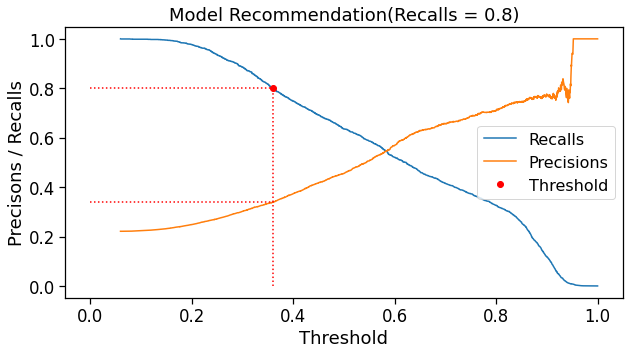

In [77]:
# Plot recommended recall = 0.8

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(thresholds, recalls, label='Recalls')
ax.plot(thresholds, precisions, label='Precisions')

ax.plot([threshold_80_recall, threshold_80_recall], [precision_80, recalls_80], "r:" )
ax.plot([threshold_80_recall, threshold_80_recall], [0, precision_80], "r:")
ax.plot([0, threshold_80_recall], [precision_80, precision_80], "r:")
ax.plot([0, threshold_80_recall], [recalls_80, recalls_80], "r:")
ax.plot([threshold_80_recall], [recalls_80], "ro", label='Threshold')

ax.set_xlabel('Threshold')
ax.set_ylabel('Precisons / Recalls')
ax.legend(loc='center right',fontsize=16)
plt.title('Model Recommendation(Recalls = 0.8)')
plt.savefig('recommended_recall')
plt.show()

### **Feature Importances:**
We will use SHAP to understand which variables are more crucial in predicting the DEFAULTS.

In [81]:
# Install SHAP
!pip install shap

     |████████████████████████████████| 564 kB 5.3 MB/s 


In [82]:
import shap
shap.initjs()

In [103]:
# Define the feature names.
features = df_copy.columns.drop('DEFAULT')

In [83]:
explainer_train = shap.TreeExplainer(xgb_imb_optimal_model)
shap_values_train = explainer_train.shap_values(X_train_sc)

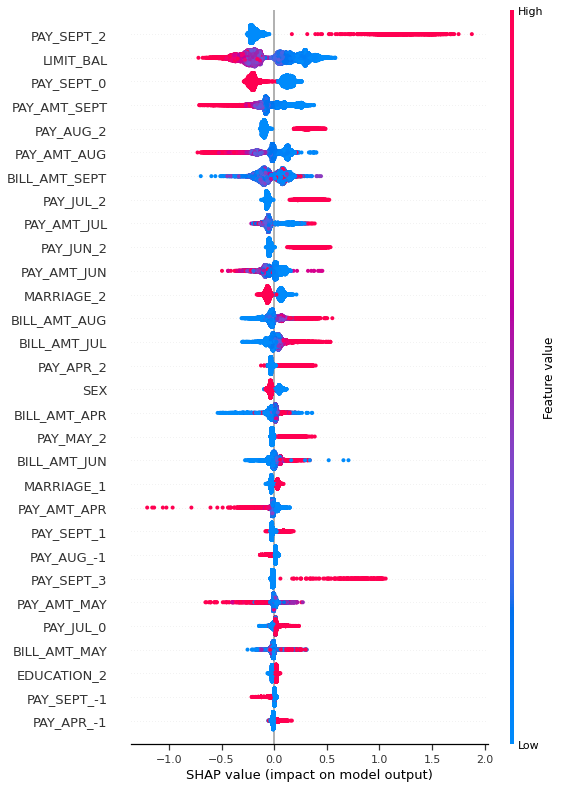

In [107]:
# Summary plot for train data.
shap.summary_plot(shap_values_train,X_train,plot_type='dot', max_display=30)

In [89]:
explainer_test = shap.TreeExplainer(xgb_imb_optimal_model)
shap_values_test = explainer_test.shap_values(X_test_sc)

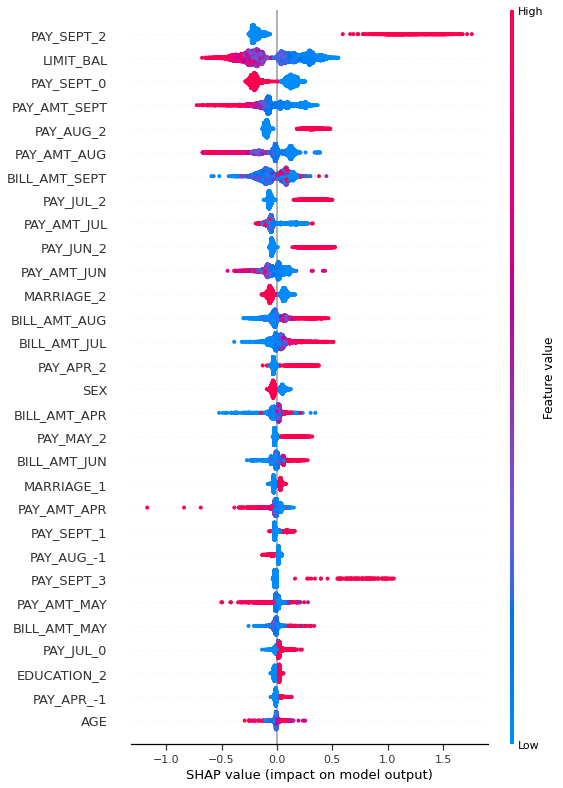

In [106]:
# Summary plot for test data.
shap.summary_plot(shap_values_test,X_test,plot_type='dot', max_display=30)

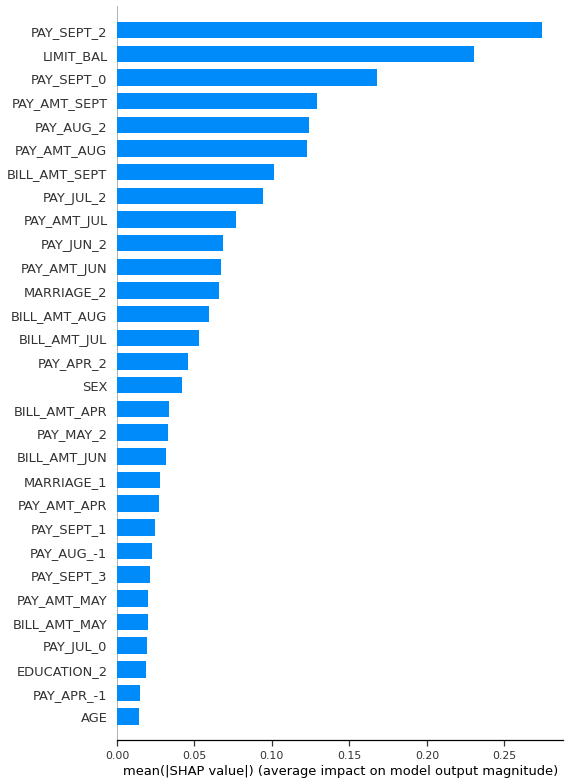

In [110]:
# Feature importances.
shap_values = shap.TreeExplainer(xgb_imb_optimal_model).shap_values(X_test_sc)
shap.summary_plot(shap_values, X_train_sc, plot_type="bar", feature_names=features, max_display=30)

# **Conclusions:**
* XG Boost Classifier with SMOTETomek gives the best accuracy of 82% but lacks recall which is crucial in classifying the defaulters.
* Using XG Boost with imbalanced data while applying the scale_pos_weight=3.521 gives the best recall of 64% approx.
* In terms of overall balance, Random Forest Classifier provides the best results.
* If a higher recall is required with a reduced precision it can be obtained by changing the default threshold value used to classify the DEFAULTS.
* The top 5 features crucial in classifying the DEFAULTS are **PAY_SEPT_2**, **LIMIT_BAL**, **PAY_SEPT_0**, **PAY_AMT_SEPT**, **PAY_AUG_2**, **PAY_AMT_AUG**, **BILL_AMT_SEPT**, **PAY_JUL_2**, **PAY_AMT_JUL**, **PAY_JUN_2**.

# **Future Scope:**
* These results can be extended to implement deep learning algorithms to learn and trace the behaviors of credit cardholders and reduce the default risks for banking industries in the future. 
* Also, collecting more data would help in reducing the class imbalance.